In [6]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (3.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.4 MB/s eta 0:00:00
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 5.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 8.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 6.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━

In [14]:
import tensorflow as tf
import os

# Listing all GPU's
gpus = tf.config.experimental.list_physical_devices('GPU')

# Limit GPU memory growth
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [16]:
# Removing unusable data
import cv2 
import imghdr

data_dir = 'data'
image_extensions = ['jpeg', 'png', 'jpg', 'bmp']

for i in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, i)):
        path = os.path.join(data_dir, i, image)

        try:
            img = cv2.imread(path)
            type = imghdr.what(path)

            if type not in image_extensions:
                print('The image is not in: ')
                print(path)
                os.remove(path)

        except Exception as ex:
            print('There is an issue with the image: ')
            print(path)

The image is not in: 
data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
The image is not in: 
data/happy/2560px-Happy_People.jpg
The image is not in: 
data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
The image is not in: 
data/happy/how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp
There is an issue with the image: 
data/happy/.ipynb_checkpoints
The image is not in: 
data/happy/Happy20People.jpg
The image is not in: 
data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
The image is not in: 
data/happy/guilherme-stecanella-375176-unsplash.jpg
The image is not in: 
data/sad/00bf280c82b547af87b7b85b162857b1.webp
The image is not in: 
data/sad/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
The image is not in: 
data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
The image is not in: 
data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
The image is not in: 
data/sad/1cd95b44e0d785987a6

Found 180 files belonging to 2 classes.


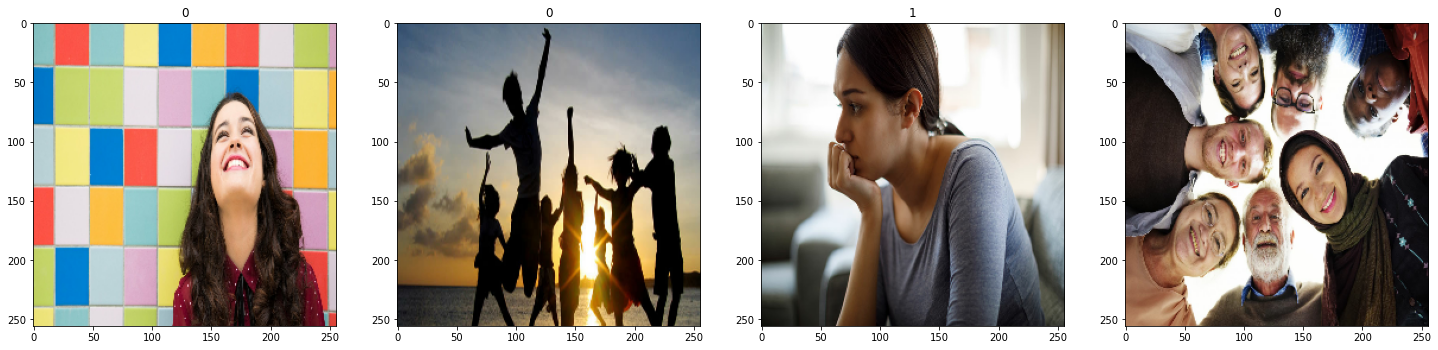

In [81]:
# Load data

import numpy as np
from matplotlib import pyplot as plt

# Create dataset

data = tf.keras.utils.image_dataset_from_directory('data') # create data pipeline
data_iterator = data.as_numpy_iterator() # allows to loop through data pipeline
batch = data_iterator.next() # access batch from data pipeline

# 1 = Sad, 0 = Happy
# batch[0] = image, batch[1] = label

plot, axis = plt.subplots(ncols=4, nrows=1, figsize=(25, 25))

for i, img in enumerate(batch[0][:4]):
    axis[i].imshow(img.astype(int))
    axis[i].title.set_text(batch[1][i])

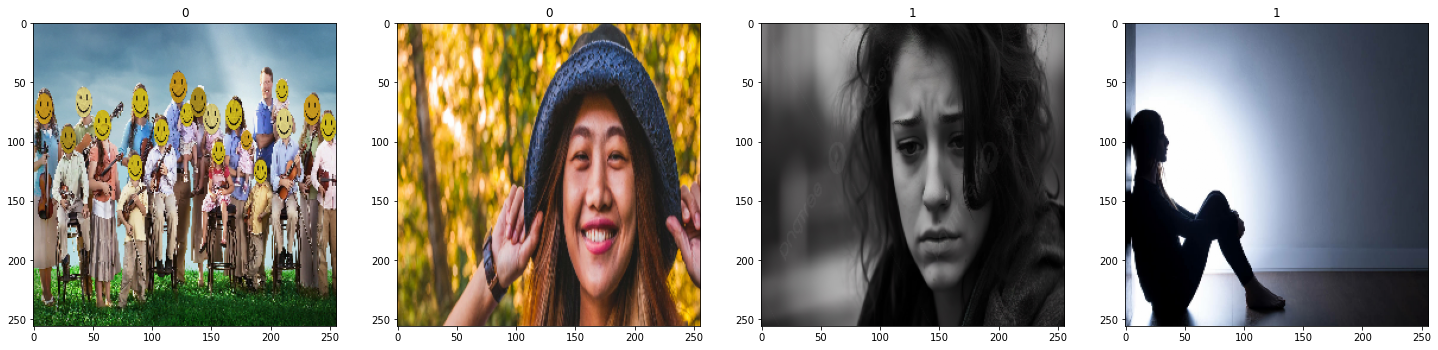

In [82]:
# Preprocessing data

# Scaling

data = data.map(lambda i, j: (i / 255, j))
scaled_iter = data.as_numpy_iterator()
batch = scaled_iter.next()

plot, axis = plt.subplots(ncols=4, nrows=1, figsize=(25, 25))

for i, img in enumerate(batch[0][:4]):
    axis[i].imshow(img)
    axis[i].title.set_text(batch[1][i])

In [116]:
# Splitting

train_len = int(len(data) * 0.7) # train deep learning model (during training)
validate_len = int(len(data) * 0.2) + 1 # evaluate deep model while training (end of training)
test_len = int(len(data) * 0.1) + 1 # not seen until final evaluation stage (after training)

# Establishing partitions

train = data.take(train_len)
validate = data.skip(train_len).take(validate_len)
test = data.skip(train_len + validate_len).take(test_len)

In [89]:
# Building deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

# First layer needs input, 16 = number of filters, (3,3) = size of filter, 1 = stride (moving 1 pixel at a time), relu = any number <= 0 will be set to 0 and any number > 0 stays the same
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# Max value after relu and return value to condense information (reducing image data)
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Condensing down to a single value
model.add(Flatten())

# AKA fully connected layers
model.add(Dense(256, activation='relu'))
# Single output that represents 0 or 1 -> takes any output and converts to a range between 0 and 1
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # adam = optimizer

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [92]:
# Training

logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # To check how model is training during training
hist = model.fit(train, epochs=20, validation_data=validate, callbacks=[tensorboard_callback]) # model.fit = training, model.predict = prediction

Epoch 1/20
4/4 [==============================] - 5s 655ms/step - loss: 1.3517 - accuracy: 0.5000 - val_loss: 0.7770 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 2s 499ms/step - loss: 0.7380 - accuracy: 0.4141 - val_loss: 0.6804 - val_accuracy: 0.7308
Epoch 3/20
4/4 [==============================] - 2s 474ms/step - loss: 0.6753 - accuracy: 0.6719 - val_loss: 0.6415 - val_accuracy: 0.5577
Epoch 4/20
4/4 [==============================] - 2s 478ms/step - loss: 0.6542 - accuracy: 0.6406 - val_loss: 0.5969 - val_accuracy: 0.6731
Epoch 5/20
4/4 [==============================] - 2s 475ms/step - loss: 0.5789 - accuracy: 0.7109 - val_loss: 0.5780 - val_accuracy: 0.7692
Epoch 6/20
4/4 [==============================] - 2s 473ms/step - loss: 0.5517 - accuracy: 0.7656 - val_loss: 0.5403 - val_accuracy: 0.6731
Epoch 7/20
4/4 [==============================] - 2s 474ms/step - loss: 0.4808 - accuracy: 0.7266 - val_loss: 0.6060 - val_accuracy: 0.6731
Epoch 8/20
4/4 [====

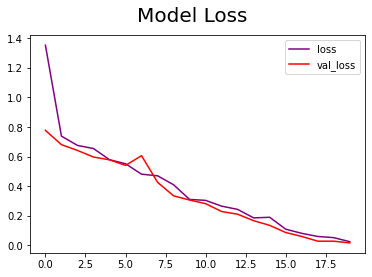

In [95]:
# Plotting Loss

figure = plt.figure()
plt.plot(hist.history['loss'], color='purple', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
figure.suptitle('Model Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

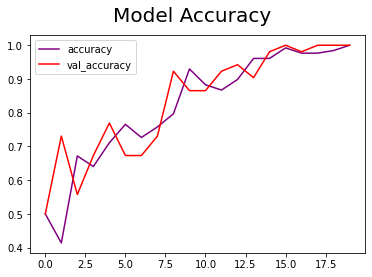

In [98]:
# Plotting Accuracy

figure = plt.figure()
plt.plot(hist.history['accuracy'], color='purple', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
figure.suptitle('Model Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [129]:
# Performance Evaluation

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch # X = images, y = true value
    yHat = model.predict(X) # returns value between 0 and 1
    # y true value, and yHat predicted value
    pre.update_state(y, yHat) 
    rec.update_state(y, yHat)
    acc.update_state(y, yHat)

In [130]:
print(pre.result(), rec.result(), acc.result())
print('Precision Result: ', pre.result().numpy())
print('Recall Result: ', rec.result().numpy())
print('Accuracy Result: ', acc.result().numpy())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)
Precision Result:  0.0
Recall Result:  0.0
Accuracy Result:  0.0


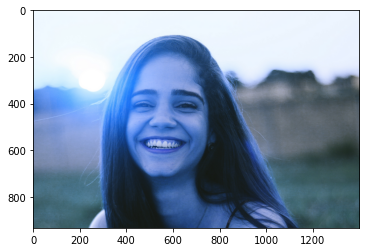

In [174]:
# Testing against unseen images

image = cv2.imread('happytest.jpg')
plt.imshow(image)
plt.show()

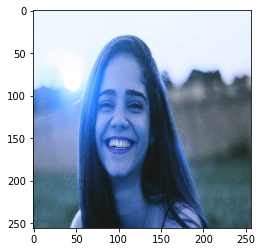

In [175]:
# Resizing image for model

resize = tf.image.resize(image, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [177]:
yHat = model.predict(np.expand_dims(resize/255, 0))

if yHat > 0.5:
    print("Prediction is Sad")
else:
    print("Prediction is Happy")

1/1 [==============================] - 0s 33ms/step
Prediction is Happy


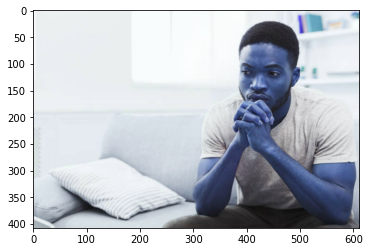

In [178]:
image = cv2.imread('sadtest.jpg')
plt.imshow(image)
plt.show()

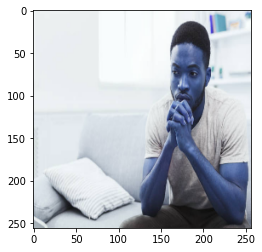

In [179]:
# Resizing image for model

resize = tf.image.resize(image, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [180]:
yHat = model.predict(np.expand_dims(resize/255, 0))

if yHat > 0.5:
    print("Prediction is Sad")
else:
    print("Prediction is Happy")

1/1 [==============================] - 0s 15ms/step
Prediction is Sad


In [184]:
# Saving

from tensorflow.keras.models import load_model

model.save(os.path.join('models', 'sentient_model.h5'))